## Question 1

In [2]:
import qiskit
def draw_qasm(qasm):
    qc = qiskit.QuantumCircuit.from_qasm_str(qasm)
    return qc.draw()
from qiskit import IBMQ
IBMQ.load_accounts()

In [3]:
#Simply change the last 3 z-gates to x-gates from the jupyter notebook
qasm_string="""
include "qelib1.inc";
qreg qr[5];
creg result[3];
//// these will serve as the bits that will help us figure out if we have errors
creg er[2];

//// First qubit is |"0"> unless you uncomment the following line 
//// to initialize to |"1">:
//x qr[0];

////See figure 3 of https://arxiv.org/pdf/0905.2794.pdf for circuit
////Desire: If first qubit was |"0"> we now have |"000">. If first qubit was |"1"> we now have |"111">
////To reach this: entangle the original qubit across 3 qubits:
cx qr[0], qr[1];
cx qr[1], qr[2];

h qr[0];
h qr[1];
h qr[2];

//// Modeling an error by uncommenting just ONE of the following suggestions:
//// (if you uncomment more than 1 the error correction is ambiguous)
//// Uncomment the following to model a single phase flip error by flipping 0th qubit:
// z qr[0];
//// If our initial state was |"0"> we now have |"100"> because of error on 0th qubit
//// if our initial state was |"1"> we now have |"011"> because of error on 0th qubit

// Uncomment the following to model a single phase flip error by flipping 1th qubit:
//z qr[1];
//// If our initial state was |"0"> we now have |"010"> because of error on 1th qubit
//// if our initial state was |"1"> we now have |"101"> because of error on 1th qubit

// Uncomment the following to model a single phas flip error by flipping 2th qubit:
//z qr[2];
//// If our initial state was |"0"> we now have |"001"> because of error on 2th qubit
//// if our initial state was |"1"> we now have |"110"> because of error on 2th qubit
h qr[0];
h qr[1];
h qr[2];


//// Now: our goal is to recover the original state. 
///// To do this we entangle with a few extra qubits (3th and 4th qubit):
cx qr[0],qr[3];
cx qr[1],qr[3];
cx qr[0],qr[4];
cx qr[2],qr[4];

//// Now we can make measurements of 3th and 4th qubit to get information about our 3 qubit without disturbing it
measure qr[3]->er[1];
measure qr[4]->er[0];

////
//// See table 1 of https://arxiv.org/pdf/0905.2794.pdf for how to correct
////case: 11 (3 in decimal), 0th qubit has error so flip back
if(er==3)
x qr[0];

////case: 10 (2 in decimal), 1th qubit has error so flip back
if(er==2)
x qr[1];

////case: 01 (1 in decimal), 2th qubit has error so flip back
if(er==1)
x qr[2];
//// 00 do nothing, there were no errors

measure qr[0]->result[0];
measure qr[1]->result[1];
measure qr[2]->result[2];

"""
draw_qasm(qasm_string)

## Question 2

{'11 000': 1000}


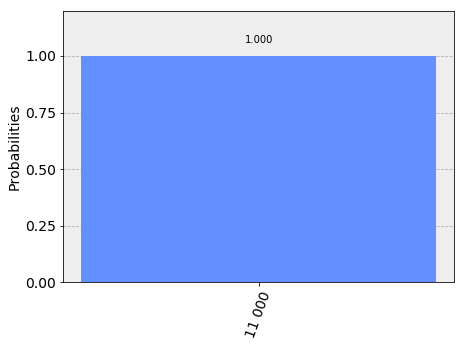

In [4]:
# Simulating a simple error
import random
from qiskit import QuantumCircuit
import time
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit import compile,execute
shots=1000
qasm_string="""
include "qelib1.inc";
qreg qr[5];
creg result[3];
//// these will serve as the bits that will help us figure out if we have errors
creg er[2];

//// First qubit is |"0"> unless you uncomment the following line 
//// to initialize to |"1">:
//x qr[0];

////See figure 3 of https://arxiv.org/pdf/0905.2794.pdf for circuit
////Desire: If first qubit was |"0"> we now have |"000">. If first qubit was |"1"> we now have |"111">
////To reach this: entangle the original qubit across 3 qubits:
cx qr[0], qr[1];
cx qr[1], qr[2];

h qr[0];
h qr[1];
h qr[2];

//// Modeling an error by uncommenting just ONE of the following suggestions:
//// (if you uncomment more than 1 the error correction is ambiguous)
//// Uncomment the following to model a single phase flip error by flipping 0th qubit:
z qr[0];
//// If our initial state was |"0"> we now have |"100"> because of error on 0th qubit
//// if our initial state was |"1"> we now have |"011"> because of error on 0th qubit

// Uncomment the following to model a single phase flip error by flipping 1th qubit:
//z qr[1];
//// If our initial state was |"0"> we now have |"010"> because of error on 1th qubit
//// if our initial state was |"1"> we now have |"101"> because of error on 1th qubit

// Uncomment the following to model a single phas flip error by flipping 2th qubit:
//z qr[2];
//// If our initial state was |"0"> we now have |"001"> because of error on 2th qubit
//// if our initial state was |"1"> we now have |"110"> because of error on 2th qubit
h qr[0];
h qr[1];
h qr[2];


//// Now: our goal is to recover the original state. 
///// To do this we entangle with a few extra qubits (3th and 4th qubit):
cx qr[0],qr[3];
cx qr[1],qr[3];
cx qr[0],qr[4];
cx qr[2],qr[4];

//// Now we can make measurements of 3th and 4th qubit to get information about our 3 qubit without disturbing it
measure qr[3]->er[1];
measure qr[4]->er[0];

////
//// See table 1 of https://arxiv.org/pdf/0905.2794.pdf for how to correct
////case: 11 (3 in decimal), 0th qubit has error so flip back
if(er==3)
x qr[0];

////case: 10 (2 in decimal), 1th qubit has error so flip back
if(er==2)
x qr[1];

////case: 01 (1 in decimal), 2th qubit has error so flip back
if(er==1)
x qr[2];
//// 00 do nothing, there were no errors

measure qr[0]->result[0];
measure qr[1]->result[1];
measure qr[2]->result[2];

"""

backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit.from_qasm_str(qasm_string)
exp_job = execute(qc,backend,shots=shots)
exp_result = exp_job.result()
final=exp_result.get_counts(qc)
print(final)
plot_histogram(final)

## Question 3

In our error correction code if 2 bits are erroneously flipped then our code will "think" that the unflipped qubit is the one with error. Thus, it will attempt to flip it back getting a state opposite of the intended one.

## Question 4

In [5]:
# Simulating a simple error
import random
from qiskit import QuantumCircuit
from qiskit.providers.aer import noise
shots=1000
qasm_string="""
include "qelib1.inc";
qreg qr[5];
creg result[3];
//// these will serve as the bits that will help us figure out if we have errors
creg er[2];

//// First qubit is |"0"> unless you uncomment the following line 
//// to initialize to |"1">:
//x qr[0];

////See figure 3 of https://arxiv.org/pdf/0905.2794.pdf for circuit
////Desire: If first qubit was |"0"> we now have |"000">. If first qubit was |"1"> we now have |"111">
////To reach this: entangle the original qubit across 3 qubits:
cx qr[0], qr[1];
cx qr[1], qr[2];


//// Modeling an error by uncommenting just ONE of the following suggestions:
//// (if you uncomment more than 1 the error correction is ambiguous)
//// Uncomment the following to model a single bit flip error by flipping 0th qubit:
//x qr[0];
//// If our initial state was |"0"> we now have |"100"> because of error on 0th qubit
//// if our initial state was |"1"> we now have |"011"> because of error on 0th qubit

// Uncomment the following to model a single bit flip error by flipping 1th qubit:
//x qr[1];
//// If our initial state was |"0"> we now have |"010"> because of error on 1th qubit
//// if our initial state was |"1"> we now have |"101"> because of error on 1th qubit

// Uncomment the following to model a single bit flip error by flipping 2th qubit:
//x qr[2];
//// If our initial state was |"0"> we now have |"001"> because of error on 2th qubit
//// if our initial state was |"1"> we now have |"110"> because of error on 2th qubit


//// Now: our goal is to recover the original state. 
///// To do this we entangle with a few extra qubits (3th and 4th qubit):
cx qr[0],qr[3];
cx qr[1],qr[3];
cx qr[0],qr[4];
cx qr[2],qr[4];

//// Now we can make measurements of 3th and 4th qubit to get information about our 3 qubit without disturbing it
measure qr[3]->er[1];
measure qr[4]->er[0];

////
//// See table 1 of https://arxiv.org/pdf/0905.2794.pdf for how to correct
////case: 11 (3 in decimal), 0th qubit has error so flip back
if(er==3)
x qr[0];

////case: 10 (2 in decimal), 1th qubit has error so flip back
if(er==2)
x qr[1];

////case: 01 (1 in decimal), 2th qubit has error so flip back
if(er==1)
x qr[2];
//// 00 do nothing, there wer no errors

measure qr[0]->result[0];
measure qr[1]->result[1];
measure qr[2]->result[2];

"""
backend = Aer.get_backend('qasm_simulator') # Local simulator
device = IBMQ.get_backend('ibmqx4')
properties = device.properties()
coupling_map = device.configuration().coupling_map
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates
exp_job = execute(qc, backend,
                    coupling_map=coupling_map,
                    noise_model=noise_model,
                    basis_gates=basis_gates)
exp_result = exp_job.result()
final=exp_result.get_counts(qc)
print(final)
plot_histogram(final)

TranspilerError: 'internal error'

Our error correction code didn't do super well when run with this noise model.

## Question 5

{'10 100': 23, '00 110': 23, '10 000': 31, '11 110': 35, '00 000': 35, '01 010': 39, '11 001': 70, '10 111': 31, '10 101': 29, '01 000': 30, '01 100': 34, '00 011': 28, '10 011': 13, '01 001': 61, '10 110': 11, '11 000': 23, '00 001': 24, '11 100': 26, '11 010': 26, '10 001': 19, '10 010': 28, '00 101': 38, '00 100': 21, '01 101': 27, '11 111': 25, '01 011': 68, '01 111': 19, '00 010': 27, '11 101': 14, '11 011': 55, '00 111': 44, '01 110': 23}


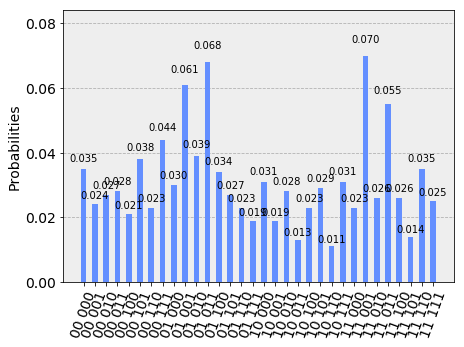

In [6]:
# Simulating a simple error
import random
from qiskit import QuantumCircuit
shots=1000
qasm_string="""
include "qelib1.inc";
qreg qr[5];
creg result[3];
//// these will serve as the bits that will help us figure out if we have errors
creg er[2];

//// First qubit is |"0"> unless you uncomment the following line 
//// to initialize to |"1">:
//x qr[0];

////See figure 3 of https://arxiv.org/pdf/0905.2794.pdf for circuit
////Desire: If first qubit was |"0"> we now have |"000">. If first qubit was |"1"> we now have |"111">
////To reach this: entangle the original qubit across 3 qubits:
cx qr[0], qr[1];
cx qr[1], qr[2];


//// Modeling an error by uncommenting just ONE of the following suggestions:
//// (if you uncomment more than 1 the error correction is ambiguous)
//// Uncomment the following to model a single bit flip error by flipping 0th qubit:
 x qr[0];
//// If our initial state was |"0"> we now have |"100"> because of error on 0th qubit
//// if our initial state was |"1"> we now have |"011"> because of error on 0th qubit

// Uncomment the following to model a single bit flip error by flipping 1th qubit:
x qr[1];
//// If our initial state was |"0"> we now have |"010"> because of error on 1th qubit
//// if our initial state was |"1"> we now have |"101"> because of error on 1th qubit

// Uncomment the following to model a single bit flip error by flipping 2th qubit:
//x qr[2];
//// If our initial state was |"0"> we now have |"001"> because of error on 2th qubit
//// if our initial state was |"1"> we now have |"110"> because of error on 2th qubit


//// Now: our goal is to recover the original state. 
///// To do this we entangle with a few extra qubits (3th and 4th qubit):
cx qr[0],qr[3];
cx qr[1],qr[3];
cx qr[0],qr[4];
cx qr[2],qr[4];

//// Now we can make measurements of 3th and 4th qubit to get information about our 3 qubit without disturbing it
measure qr[3]->er[1];
measure qr[4]->er[0];


//// 00 do nothing, there wer no errors

measure qr[0]->result[0];
measure qr[1]->result[1];
measure qr[2]->result[2];

"""

backend = IBMQ.get_backend('ibmqx4')
qc = QuantumCircuit.from_qasm_str(qasm_string)
exp_job = execute(qc,backend,shots=shots)
exp_result = exp_job.result()
final=exp_result.get_counts(qc)
print(final)
plot_histogram(final)

The second qubit flipped slightly less than half the time...